# COVID 19 PNEUMONIA DETECTION PROJECT





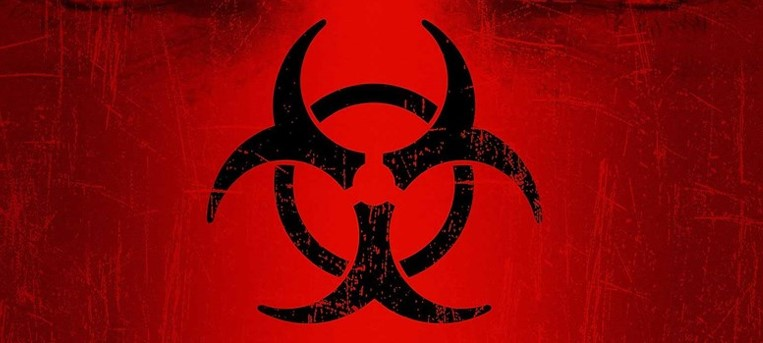

* <div align = center> Firstly, i'm inviting you to read this notebook in listening this famous dramatical song ''In the House, In a Heartbeat - John Murphy'' link there (https://www.youtube.com/watch?v=ST2H8FWDvEA) enjoy :-)




* <div align = center>  Secundly, we particulary focused on reducing bias (Black areas on xrays and upper areas ike head neck ..)manual method of croping images, check this part for more details on the code

* # Data

Database of COVID-19 x-ray images from Italian Society of Medical and Interventional Radiology (SIRM) COVID-19 DATABASE, Novel Corona Virus 2019 Dataset developed by Joseph Paul Cohen and Paul Morrison and Lan Dao in GitHub and images extracted from 43 different publications. References for each image is provided. Normal and Viral pneumonia images were adopted from Chest X-Ray Images (pneumonia) database. link of data as follow https://www.kaggle.com/tawsifurrahman/covid19-radiography-database

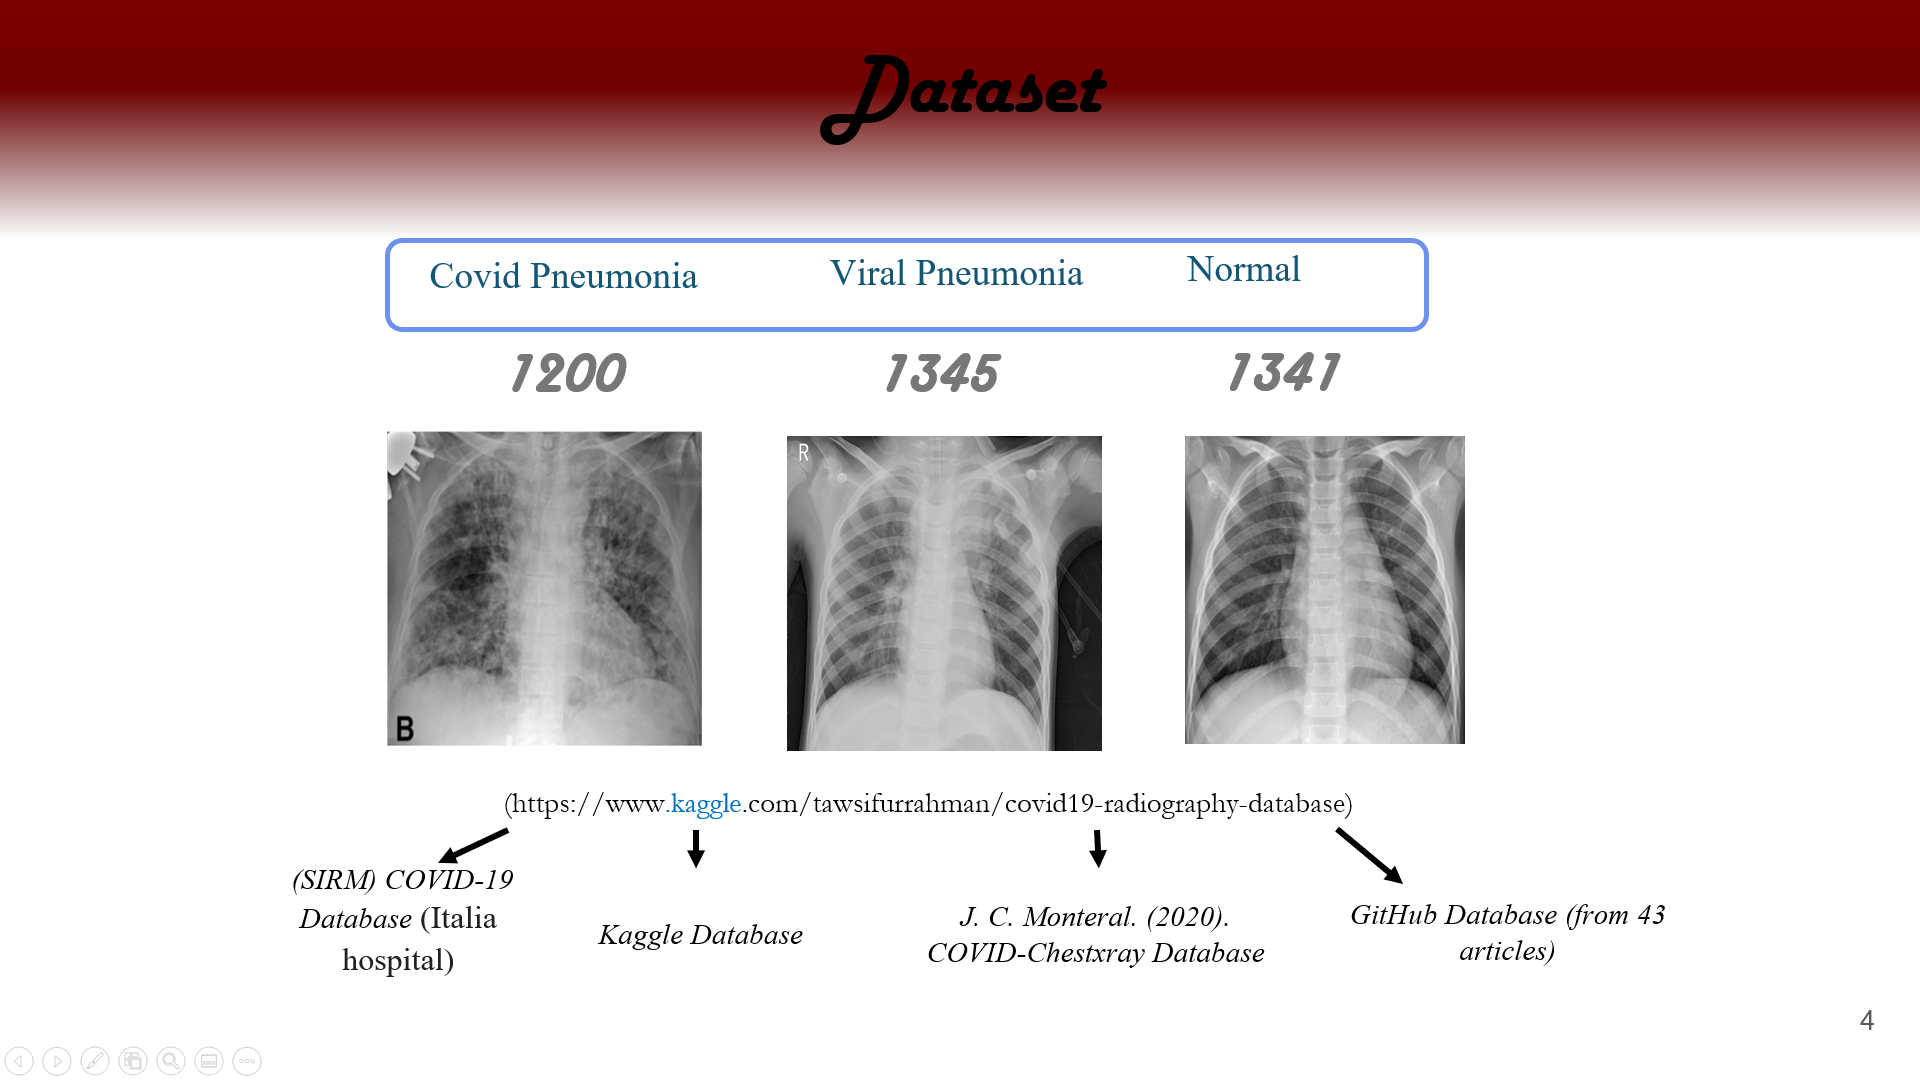

* ## Problematique & interest
The process of detection of pneumonia on X-rays requires a lot of expertise and analysis time. Especially concerning the detection of covid pneumonia,wich pose great difficulties for the medical profession and radiologist to distinguish covid pneumonia and other virales pneumonia 

 To elaborate a performing model of covid pneumonia detection on radio images is a major key to get :

- Faster covid diagnosis,
- Complementary diagnosis "better" than radiologist himself
- Lower cost of using more frequently radio instead of mri, CT and NM (nuclear medecin)  

- ---------------> perhaps saving life !




------------------------------------------------------------------------

* # Summary
### 1/Preprocess 
### 2/Custom Xception model 
### 3/Grad-cam
### 4/Conclusion 





In [ ]:
#import classical libraries

import pandas as pd
import tensorflow as tf
import numpy as np 
import matplotlib.pyplot as plt 
import cv2

tf.__version__

'2.4.1'

In [3]:
# we are working on collab btw
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 1/ PREPROCESSING

# Reduction of bias and cropping to areas of interest in the lungs

CROPING WITH PHOTO TOOL OF WINDOW



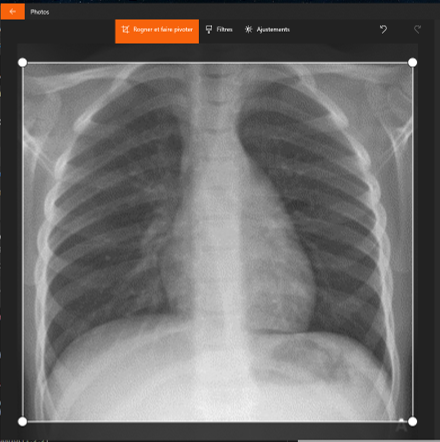

WHY is it so important to crop our images there, indeed, we observed heterogeneity of  images qualities and size between our 3 groupes, the aim is to force our model to only focus interested areas (lunch) and not to focus the neck or black side

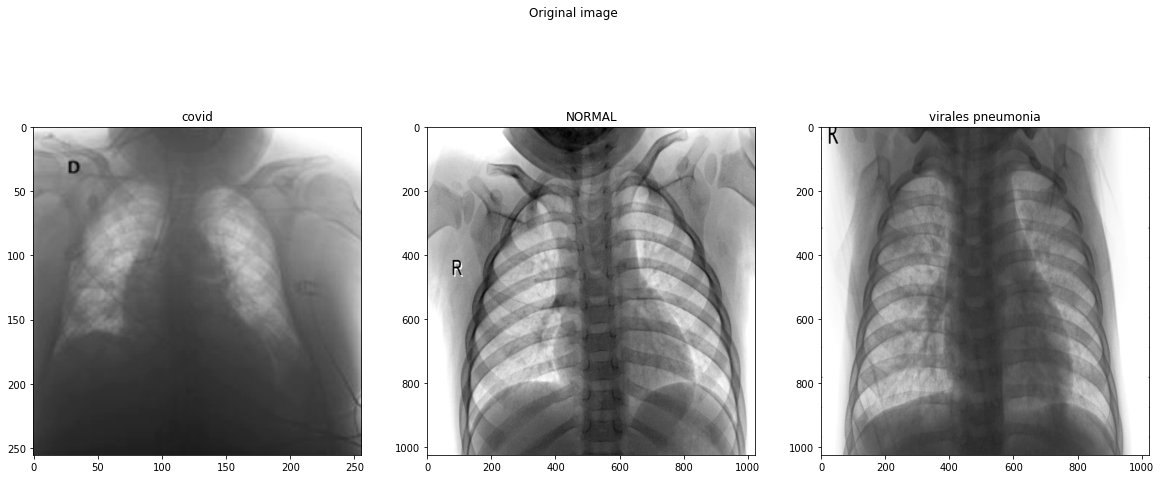

covid shape :
(256, 256)
Normal shape :
(1024, 1024)
virale pneumonia shpae :
(1024, 1024)


In [ ]:
plt.figure(figsize=(20,20))



plt.subplot(1,3,1)
img = cv2.imread('/content/drive/MyDrive/Projet _covid/COVID-19 Radiography Database/COVID/COVID (100).png',0)
plt.imshow(img, cmap='binary')
plt.title('covid')



plt.subplot(1,3,2)
img2 = cv2.imread("/content/drive/MyDrive/Projet _covid/COVID-19 Radiography Database/NORMAL/NORMAL (100).png",0)
plt.imshow(img2 , cmap='binary')
plt.title('NORMAL')



plt.subplot(1,3,3)
img3= cv2.imread("/content/drive/MyDrive/Projet _covid/COVID-19 Radiography Database/Viral Pneumonia/Viral Pneumonia (100).png",0)
plt.imshow(img3 , cmap='binary')
plt.title('virales pneumonia')


plt.suptitle("Original image", x = 0.5,y=0.7)


plt.show()

print('covid shape :')
print(img.shape)
print('Normal shape :')
print(img2.shape)
print('virale pneumonia shpae :')
print(img3.shape)


*  The aim is to focus interested areas and reducing environment bias 

* note that we did the manual crop on evey images and we could take other method in accunt like choosing using other method like boxing box model or lunch segmentation with Yolov5, we did a manual cropping cause it was more precise and we did a other notebook with a cv2 croping, this way to do is less precise but faster !

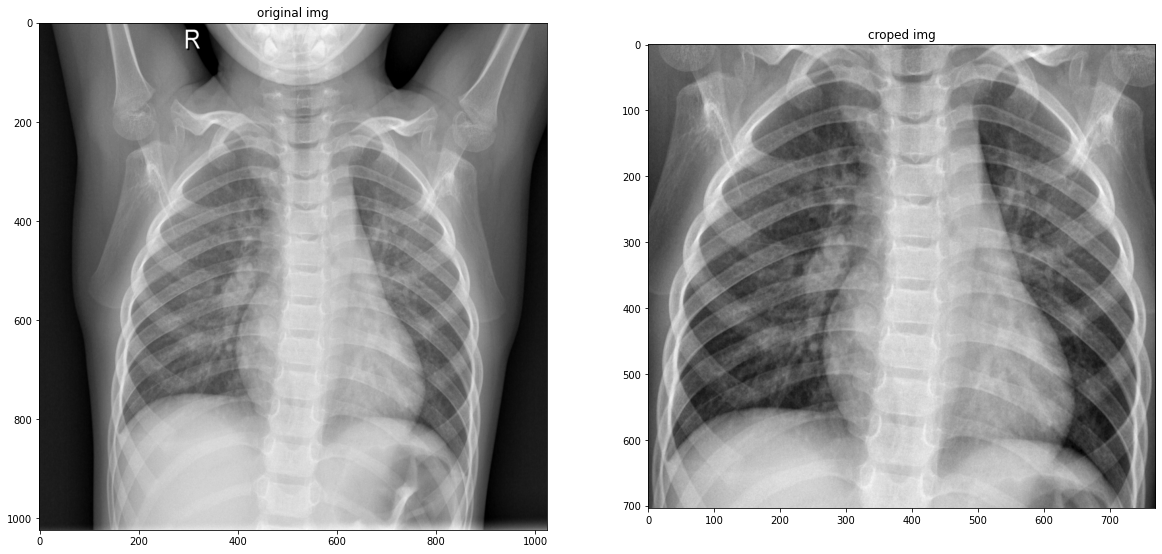

In [ ]:


# classic croping we did on every images to focus interested areas
plt.figure(figsize=(20,20))


plt.subplot(1,2,1)
img = cv2.imread('/content/drive/MyDrive/Projet _covid/infos dataset 1/zoom img/NORMAL (1).png',0)
plt.imshow(img, cmap='gray')
plt.title('original img')


plt.subplot(1,2,2)
template = cv2.imread("/content/drive/MyDrive/Projet _covid/infos dataset 1/zoom img/NORMAL zoom (1).png",0)
plt.imshow(template , cmap='gray')
plt.title('croped img')

plt.show()

- ### GET THE DATA

So we cropped a big part of images ( approximatly 3300 and we kept untouch  500 test img that we put in a other folder)

In [ ]:
zip_file = tf.keras.utils.get_file("/content/drive/MyDrive/Projet _covid/radio_crop.zip", 
                                   "/content/drive/MyDrive/Projet _covid/radio_crop.zip",
                                   cache_subdir="/content/drive/MyDrive/Projet _covid/COVID-19 Radiography Database Handcrop",  archive_format = 'zip',
                                   extract=True)

In [ ]:
zip_file = tf.keras.utils.get_file("Test.zip", 
                                   "/content/drive/MyDrive/Projet _covid/COVID 19 test data for croping/Test.zip",
                                   cache_subdir="/content/drive/MyDrive/Projet _covid/COVID 19 test data for croping/", archive_format = 'zip',
                                   extract=True)

In [ ]:
import pathlib
#train foler croped images
train_folder = pathlib.Path("/content/drive/MyDrive/Projet _covid/COVID-19 Radiography Database Handcrop")

#test folder
test_folder = pathlib.Path("/content/drive/MyDrive/Projet _covid/COVID 19 test data for croping/Test")

In [ ]:
#train
all_image_paths_for_train = [str(img_path) for img_path in list(train_folder.glob("*/*.png"))]
#test
all_image_paths_for_test = [str(img_path) for img_path in list(test_folder.glob("*/*.png"))]

display(all_image_paths_for_train[-5:])
print('\n')
display(all_image_paths_for_test[-5:])

['/content/drive/MyDrive/Projet _covid/COVID-19 Radiography Database Handcrop/Viral Pneumonia/Viral Pneumonia (1054).png',
 '/content/drive/MyDrive/Projet _covid/COVID-19 Radiography Database Handcrop/Viral Pneumonia/Viral Pneumonia (1055).png',
 '/content/drive/MyDrive/Projet _covid/COVID-19 Radiography Database Handcrop/Viral Pneumonia/Viral Pneumonia (1056).png',
 '/content/drive/MyDrive/Projet _covid/COVID-19 Radiography Database Handcrop/Viral Pneumonia/Viral Pneumonia (1057).png',
 '/content/drive/MyDrive/Projet _covid/COVID-19 Radiography Database Handcrop/Viral Pneumonia/Viral Pneumonia (1058).png']

['/content/drive/MyDrive/Projet _covid/COVID 19 test data for croping/Test/Pneumo/Viral Pneumonia (145).png',
 '/content/drive/MyDrive/Projet _covid/COVID 19 test data for croping/Test/Pneumo/Viral Pneumonia (146).png',
 '/content/drive/MyDrive/Projet _covid/COVID 19 test data for croping/Test/Pneumo/Viral Pneumonia (147).png',
 '/content/drive/MyDrive/Projet _covid/COVID 19 test data for croping/Test/Pneumo/Viral Pneumonia (148).png',
 '/content/drive/MyDrive/Projet _covid/COVID 19 test data for croping/Test/Pneumo/Viral Pneumonia (149).png']

In [ ]:
print(len(all_image_paths_for_train))# number of images total on train
print(len(all_image_paths_for_test )) # number of images total on test

3361
502


### Creating X dataframe

In [ ]:
#train
df_train = pd.DataFrame(all_image_paths_for_train)
df_train= df_train.rename(columns={0:'X'})
df_train.head()


,X
0,/content/drive/MyDrive/Projet _covid/COVID-19 ...
1,/content/drive/MyDrive/Projet _covid/COVID-19 ...
2,/content/drive/MyDrive/Projet _covid/COVID-19 ...
3,/content/drive/MyDrive/Projet _covid/COVID-19 ...
4,/content/drive/MyDrive/Projet _covid/COVID-19 ...


In [ ]:
#test
df_test = pd.DataFrame(all_image_paths_for_test)
df_test= df_test.rename(columns={0:'X'})
df_test.head()


,X
0,/content/drive/MyDrive/Projet _covid/COVID 19 ...
1,/content/drive/MyDrive/Projet _covid/COVID 19 ...
2,/content/drive/MyDrive/Projet _covid/COVID 19 ...
3,/content/drive/MyDrive/Projet _covid/COVID 19 ...
4,/content/drive/MyDrive/Projet _covid/COVID 19 ...



### Creating Y(labels)

In [ ]:
# for train
labels = []
for label in train_folder.iterdir():
  labels += [label.name]

label_index = {}

for i, label in enumerate(labels):
  label_index[label]= i

display(label_index)

# for test
labels_test = []
for label in test_folder.iterdir():
  labels_test += [label.name]


label_index_test = {}

for i, label in enumerate(labels_test):
  label_index_test[label]= i

display(label_index_test)

{'COVID': 0, 'NORMAL': 1, 'Viral Pneumonia': 2}

{'COVID': 0, 'Normal': 1, 'Pneumo': 2}

In [ ]:
# Create lables for each image
all_image_labels_train = [label_index[path.parent.name] for path in list(train_folder.glob("*/*"))]
all_image_labels_test = [label_index_test[path.parent.name] for path in list(test_folder.glob("*/*"))]

df_train['Y'] = all_image_labels_train
df_test['Y'] = all_image_labels_test

print('train')
print('---------------------------------------------------')
display(df_train.head())
print('\n')
print('\n')
print('Labels numbers :')
print('\n')
print(df_train['Y'].value_counts())
print('\n')
print('\n')


print('test')
print('---------------------------------------------------')
display(df_train.head())
print('\n')
print('\n')
print('Labels numbers :')
print('\n')
print(df_test['Y'].value_counts())

train
---------------------------------------------------


,X,Y
0,/content/drive/MyDrive/Projet _covid/COVID-19 ...,0
1,/content/drive/MyDrive/Projet _covid/COVID-19 ...,0
2,/content/drive/MyDrive/Projet _covid/COVID-19 ...,0
3,/content/drive/MyDrive/Projet _covid/COVID-19 ...,0
4,/content/drive/MyDrive/Projet _covid/COVID-19 ...,0






Labels numbers :


1    1194
0    1100
2    1067
Name: Y, dtype: int64




test
---------------------------------------------------


,X,Y
0,/content/drive/MyDrive/Projet _covid/COVID-19 ...,0
1,/content/drive/MyDrive/Projet _covid/COVID-19 ...,0
2,/content/drive/MyDrive/Projet _covid/COVID-19 ...,0
3,/content/drive/MyDrive/Projet _covid/COVID-19 ...,0
4,/content/drive/MyDrive/Projet _covid/COVID-19 ...,0






Labels numbers :


1    247
2    150
0    105
Name: Y, dtype: int64


* We got 105 covid pneumonia in our test set

## Creating  train/val dataset and Convering paths in to tensor images

Train(0.65)

Val(0.2)

Test(0.15)

In [ ]:
X= df_train.X
Y=df_train.Y

X_test = df_test.X
y_test=df_test.Y

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.2, random_state=1,shuffle=True)




# creating necessary format tensor to be processed by the model
tensortrain_set = tf.data.Dataset.from_tensor_slices((X_train))
tensortval_set = tf.data.Dataset.from_tensor_slices((X_val))
tensortest_set = tf.data.Dataset.from_tensor_slices((X_test))

Y_train = tf.data.Dataset.from_tensor_slices(y_train)
Y_val = tf.data.Dataset.from_tensor_slices(y_val)  
Y_test= tf.data.Dataset.from_tensor_slices(y_test)


* Process data augmentation for train

In [ ]:
def data_aug(img, label):

  img= tf.io.read_file(img)
  img = tf.image.decode_jpeg(img, channels=3)
  img = tf.image.resize(img, [256, 256])
  img = tf.image.random_flip_left_right(img)
  img = tf.image.random_contrast(img, 0.9, 1.2)
  img = tf.image.random_crop(img, [256,256,3])
  img = img / 255

  return img, label

In [ ]:
tensortrain_set = tf.data.Dataset.zip((tensortrain_set, Y_train))
repeated_train_set= tensortrain_set.repeat(3)
repeated_train_set= repeated_train_set.map(data_aug)

* Process on test_set without dataugmentation

In [ ]:
def load_and_preprocess_images(img):
  img = tf.io.read_file(img)
  img = tf.image.decode_jpeg(img, channels=3)
  img = tf.image.resize(img, [256, 256])
  img = img / 255
  return img

In [ ]:

tensortval_set = tensortval_set.map(load_and_preprocess_images)
val_set = tf.data.Dataset.zip((tensortval_set, Y_val))

tensortest_set = tensortest_set.map(load_and_preprocess_images)
test_set = tf.data.Dataset.zip((tensortest_set, Y_test))

In [ ]:

print('size of repeated_train_set is {} total images'.format(len(repeated_train_set)))
print('size of val_set is {} images total'.format(len(val_set)))
print('size of test_set is {} images total'.format(len(test_set)))

size of repeated_train_set is 8064 total images
size of val_set is 673 images total
size of test_set is 502 images total


In [ ]:
repeated_train_set = repeated_train_set.shuffle(len(repeated_train_set)).batch(10)

val_set = val_set.batch(10)

test_set = test_set.batch(10)

# Custom Xception Model


In [ ]:
def build_model_2():
    # we will use costum training with xception
    input_tensor = tf.keras.Input(shape=(256,256,3))
    xception = tf.keras.applications.Xception(input_shape=(256,256,3),include_top=False, input_tensor=input_tensor)
    xception.trainable = False # The xception will use imagnet weight by default
    
    top_model = tf.keras.Sequential()
    top_model.add(tf.keras.layers.GlobalMaxPooling2D())
    top_model.add(tf.keras.layers.Dense(4096, activation=tf.nn.relu))
    top_model.add(tf.keras.layers.Dropout(0.3))
    top_model.add(tf.keras.layers.Dense(512, activation=tf.nn.relu))
    top_model.add(tf.keras.layers.Dense(512, activation=tf.nn.relu))
    top_model.add(tf.keras.layers.Dropout(0.3))
   
    top_model.add(tf.keras.layers.Dense(3, activation=tf.nn.softmax))
    
    model = tf.keras.Model(inputs=xception.input, outputs=top_model(xception.output))
    
    model.compile(optimizer = 'Adam',
              loss= tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics = tf.keras.metrics.SparseCategoricalAccuracy())
    return model

In [ ]:
model = build_model_2()
model.summary() # This is our archtecture model


83689472/83683744 [==============================] - 0s 0us/step
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 127, 127, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 127, 127, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 127, 127, 32) 0           block1_conv1_bn[0][0]            
_____________________________

In [ ]:


from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("/content/drive/MyDrive/Projet _covid/infos dataset 1/xception_handcrop.h5", monitor='val_sparse_categorical_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_sparse_categorical_accuracy',min_delta=0, patience=20, verbose=1, mode='auto')

In [ ]:
history = model.fit(x=repeated_train_set, validation_data=val_set , epochs=20, callbacks=[checkpoint])#,early])

Epoch 1/20
807/807 [==============================] - 976s 261ms/step - loss: 0.7793 - sparse_categorical_accuracy: 0.8150 - val_loss: 0.1534 - val_sparse_categorical_accuracy: 0.9465

Epoch 00001: val_sparse_categorical_accuracy improved from -inf to 0.94651, saving model to /content/drive/MyDrive/Projet _covid/infos dataset 1/xception_handcrop.h5
Epoch 2/20
807/807 [==============================] - 150s 69ms/step - loss: 0.2338 - sparse_categorical_accuracy: 0.9220 - val_loss: 0.1772 - val_sparse_categorical_accuracy: 0.9198

Epoch 00002: val_sparse_categorical_accuracy did not improve from 0.94651
Epoch 3/20
807/807 [==============================] - 148s 69ms/step - loss: 0.1888 - sparse_categorical_accuracy: 0.9321 - val_loss: 0.1661 - val_sparse_categorical_accuracy: 0.9510

Epoch 00003: val_sparse_categorical_accuracy improved from 0.94651 to 0.95097, saving model to /content/drive/MyDrive/Projet _covid/infos dataset 1/xception_handcrop.h5
Epoch 4/20
807/807 [==================

In [ ]:
#model.save('/content/drive/MyDrive/Projet _covid/infos dataset 1/Resnet 51 model save 0.9640') 


#new_model = tf.keras.models.load_model('saved_model/my_model')
#new_model.summary()

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Projet _covid/infos dataset 1/Resnet 51 model save 0.9640/assets


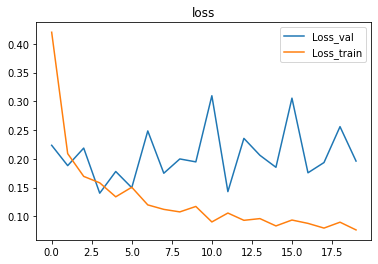

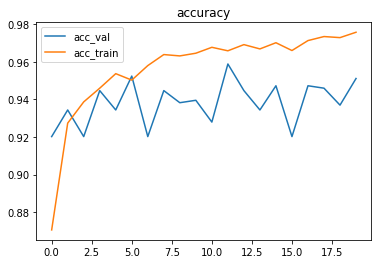

In [ ]:
loss_curve = history.history["loss"]
loss_val = history.history["val_loss"]
acc_curve = history.history["sparse_categorical_accuracy"]
acc_val = history.history["val_sparse_categorical_accuracy"]

plt.plot(loss_val,label="Loss_val")
plt.plot(loss_curve,label="Loss_train")
plt.legend()
plt.title("loss")
plt.show()

plt.plot(acc_val, label="acc_val" )
plt.plot(acc_curve, label="acc_train" )
plt.legend()
plt.title("accuracy")
plt.show()

# GRAD CAM - HEATMAP

we used a grad_cam method to vsualize gradient of the trained model directly on predict images, it's very beautiful but usefull 

In [ ]:
# load our trained model xception
model = tf.keras.models.load_model("/content/drive/MyDrive/Projet _covid/infos dataset 1/xception_handcrop.h5")

In [ ]:
#for the prepocessing of image
img_size = (256, 256)
preprocess_input = tf.keras.applications.xception.preprocess_input

#we selected the last convolution layers
last_conv_layer_name = "block14_sepconv2_act"
classifier_layer_names = ["sequential"]

In [ ]:
def get_img_array(img_path, size):
    
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=size)
    array = tf.keras.preprocessing.image.img_to_array(img)
    array = np.expand_dims(array, axis=0)
    return array


def make_gradcam_heatmap(
    img_array, model, last_conv_layer_name, classifier_layer_names
):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer
    last_conv_layer = model.get_layer(last_conv_layer_name)
    last_conv_layer_model = tf.keras.Model(model.inputs, last_conv_layer.output)

    # Second, we create a model that maps the activations of the last conv
    # layer to the final class predictions

    classifier_input = tf.keras.Input(shape=last_conv_layer.output.shape[1:])
    x = classifier_input
    for layer_name in classifier_layer_names:
        x = model.get_layer(layer_name)(x)
    classifier_model = tf.keras.Model(classifier_input, x)

    #classifier = model.get_layer(classifier_layer_names)
    #classifier_model = tf.keras.Model(classifier.input, classifier.output)

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        # Compute activations of the last conv layer and make the tape watch it
        last_conv_layer_output = last_conv_layer_model(img_array)
        tape.watch(last_conv_layer_output)
        # Compute class predictions
        preds = classifier_model(last_conv_layer_output)
        top_pred_index = tf.argmax(preds[0])
        top_class_channel = preds[:, top_pred_index]

    # This is the gradient of the top predicted class with regard to
    # the output feature map of the last conv layer
    grads = tape.gradient(top_class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    last_conv_layer_output = last_conv_layer_output.numpy()[0]
    pooled_grads = pooled_grads.numpy()
    for i in range(pooled_grads.shape[-1]):
        last_conv_layer_output[:, :, i] *= pooled_grads[i]

    # The channel-wise mean of the resulting feature map
    # is our heatmap of class activation
    heatmap = np.mean(last_conv_layer_output, axis=-1)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = np.maximum(heatmap, 0) / np.max(heatmap)
    return heatmap

In [ ]:
import glob
from PIL import Image
covid = "/content/drive/MyDrive/Projet _covid/infos dataset 1/Zoom_all_img/COVID-19 Radiography Database/COVID/*"
pneumo = "/content/drive/MyDrive/Projet _covid/infos dataset 1/Zoom_all_img/COVID-19 Radiography Database/NORMAL/*"
normal = "/content/drive/MyDrive/Projet _covid/infos dataset 1/Zoom_all_img/COVID-19 Radiography Database/Viral Pneumonia/*"
path_covid = glob.glob(covid)[7]
path_pneumo = glob.glob(pneumo)[7]
path_normal = glob.glob(normal)[7]
img_covid = Image.open(glob.glob(covid)[7])
img_pneumo = Image.open(glob.glob(pneumo)[7])
img_normal = Image.open(glob.glob(normal)[7])

In [ ]:
glob.glob(covid)[86]

'/content/drive/MyDrive/Projet _covid/infos dataset 1/Zoom_all_img/COVID-19 Radiography Database/COVID/COVID (299).png'

In [ ]:
# Prepare image
img_array_c = preprocess_input(get_img_array(path_covid, size=img_size))
img_array_p = preprocess_input(get_img_array(path_pneumo, size=img_size))
img_array_n = preprocess_input(get_img_array(path_normal, size=img_size))


#9Generate class activation heatmap
heatmap_c = make_gradcam_heatmap(
    img_array_c, model, last_conv_layer_name, classifier_layer_names
)
heatmap_p = make_gradcam_heatmap(
    img_array_p, model, last_conv_layer_name, classifier_layer_names
)
heatmap_n = make_gradcam_heatmap(
    img_array_n, model, last_conv_layer_name, classifier_layer_names
)


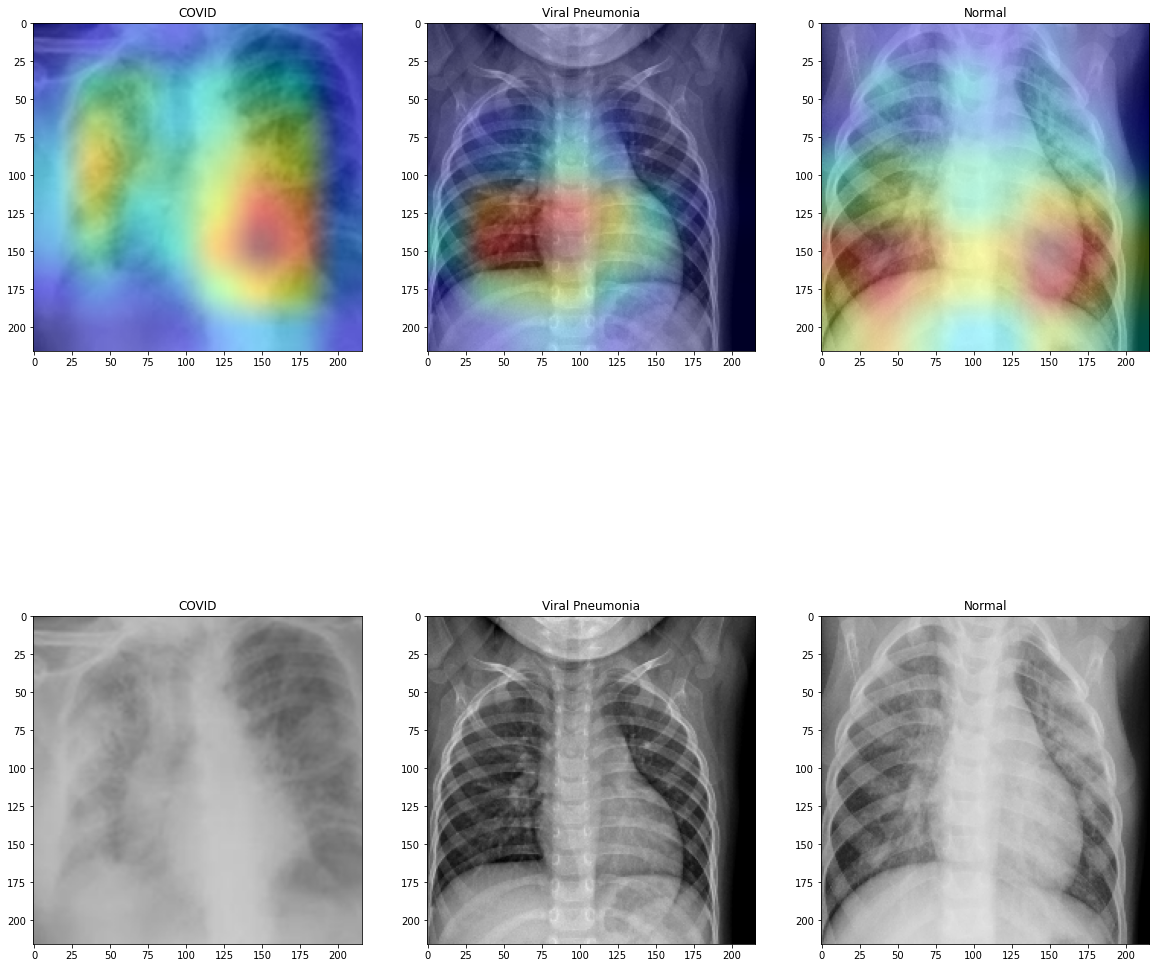

In [ ]:
import matplotlib.cm as cm


def superpose(path, heatmap):
    # We load the original image
    img = tf.keras.preprocessing.image.load_img(path)
    img = tf.keras.preprocessing.image.img_to_array(img)
    # We rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)
    # We use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")
    # We use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]
    # We create an image with RGB colorized heatmap
    jet_heatmap = tf.keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = tf.keras.preprocessing.image.img_to_array(jet_heatmap)
    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * 0.4 + img
    return  tf.keras.preprocessing.image.array_to_img(superimposed_img)
    
    

# Save the superimposed image
#save_path = "grad_cam_radio.jpg"
#superimposed_img.save(save_path)

# Display Grad CAM
#display(Image(save_path))
plt.figure(figsize=(20,20))

plt.subplot(2,3,1)
plt.imshow(superpose(path_covid,heatmap_c))
plt.title("COVID")

plt.subplot(2,3,2)
plt.imshow(superpose(path_pneumo,heatmap_p))
plt.title("Viral Pneumonia")

plt.subplot(2,3,3)
plt.imshow(superpose(path_normal,heatmap_n))
plt.title("Normal")

plt.subplot(2,3,4)
plt.imshow(img_covid,cmap='binary')
plt.title("COVID")

plt.subplot(2,3,5)
plt.imshow(img_pneumo,cmap='binary')
plt.title("Viral Pneumonia")

plt.subplot(2,3,6)
plt.imshow(img_normal,cmap='binary')
plt.title("Normal")

plt.show()

just a tips to check the contrast variability, but its useless there, exept if we need to use normalisation method on contrast as seen in this article ( https://arxiv.org/pdf/2004.04582.pdf ) to perform contrast enhancement, edge enhancement, and noise elimination on entire CXR images by employing histogram equalization (HGE), Perona-Malik filter (PMF),

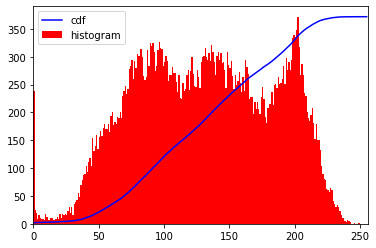

In [ ]:


img = cv2.imread('/content/drive/MyDrive/Projet _covid/infos dataset 1/Zoom_all_img/COVID-19 Radiography Database/COVID/COVID (5).png',0)
hist,bins = np.histogram(img.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

# EVALUATE OUR DATA TEST

In [ ]:
model = tf.keras.models.load_model("/content/drive/MyDrive/Projet _covid/infos dataset 1/xception_handcrop.h5")

In [ ]:
model.evaluate(test_set)

51/51 [==============================] - 11s 214ms/step - loss: 0.3753 - sparse_categorical_accuracy: 0.9183


[0.37528616189956665, 0.9183266758918762]

In [ ]:
predict = model.predict(test_set)

In [ ]:
tf.math.confusion_matrix(y_test,tf.argmax(predict, axis=1).numpy())

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[103,   0,   2],
       [  1, 231,  15],
       [  2,  21, 127]], dtype=int32)>

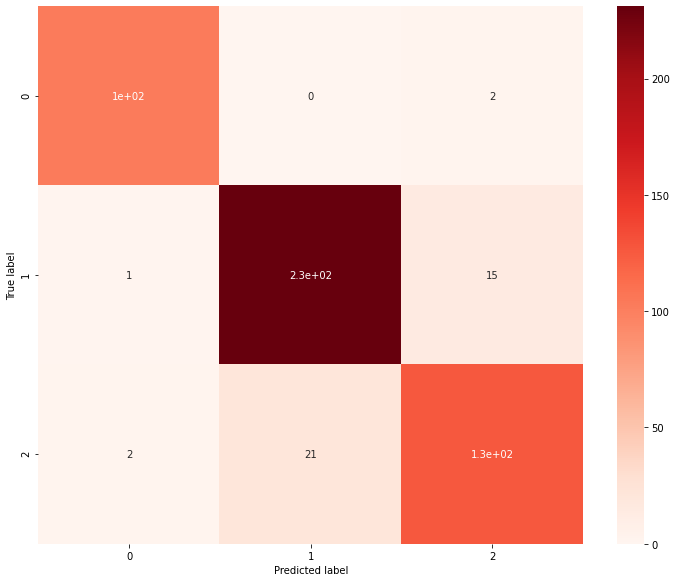

In [ ]:
import seaborn as sns

figure = plt.figure(figsize=(10, 8))
sns.heatmap(tf.math.confusion_matrix(y_test,tf.argmax(predict, axis=1).numpy()), annot=True,cmap=plt.cm.Reds )
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
accuracy_covid = 103/(103+2)
accuracy_normal = 231/(231+15+1)
accuracy_pneumo = 127/(127+21+2)
print('accuracy on covid pneumonia is : {} '.format(accuracy_covid))
print('accuracy on normal without pneumonia is : {} '.format(accuracy_normal))
print('accuracy on other virales pneumonias is : {} '.format(accuracy_pneumo))

accuracy on covid pneumonia is : 0.9809523809523809 
accuracy on normal without pneumonia is : 0.9352226720647774 
accuracy on other virales pneumonias is : 0.8466666666666667 


* ### Result conclusion

we got really high accuracy with  small false negative on covid pneumonia detection 

# Conclusion

### Our result show great performance, see as follow a comparaison with other kaggles and scientific report

TEST SCORE

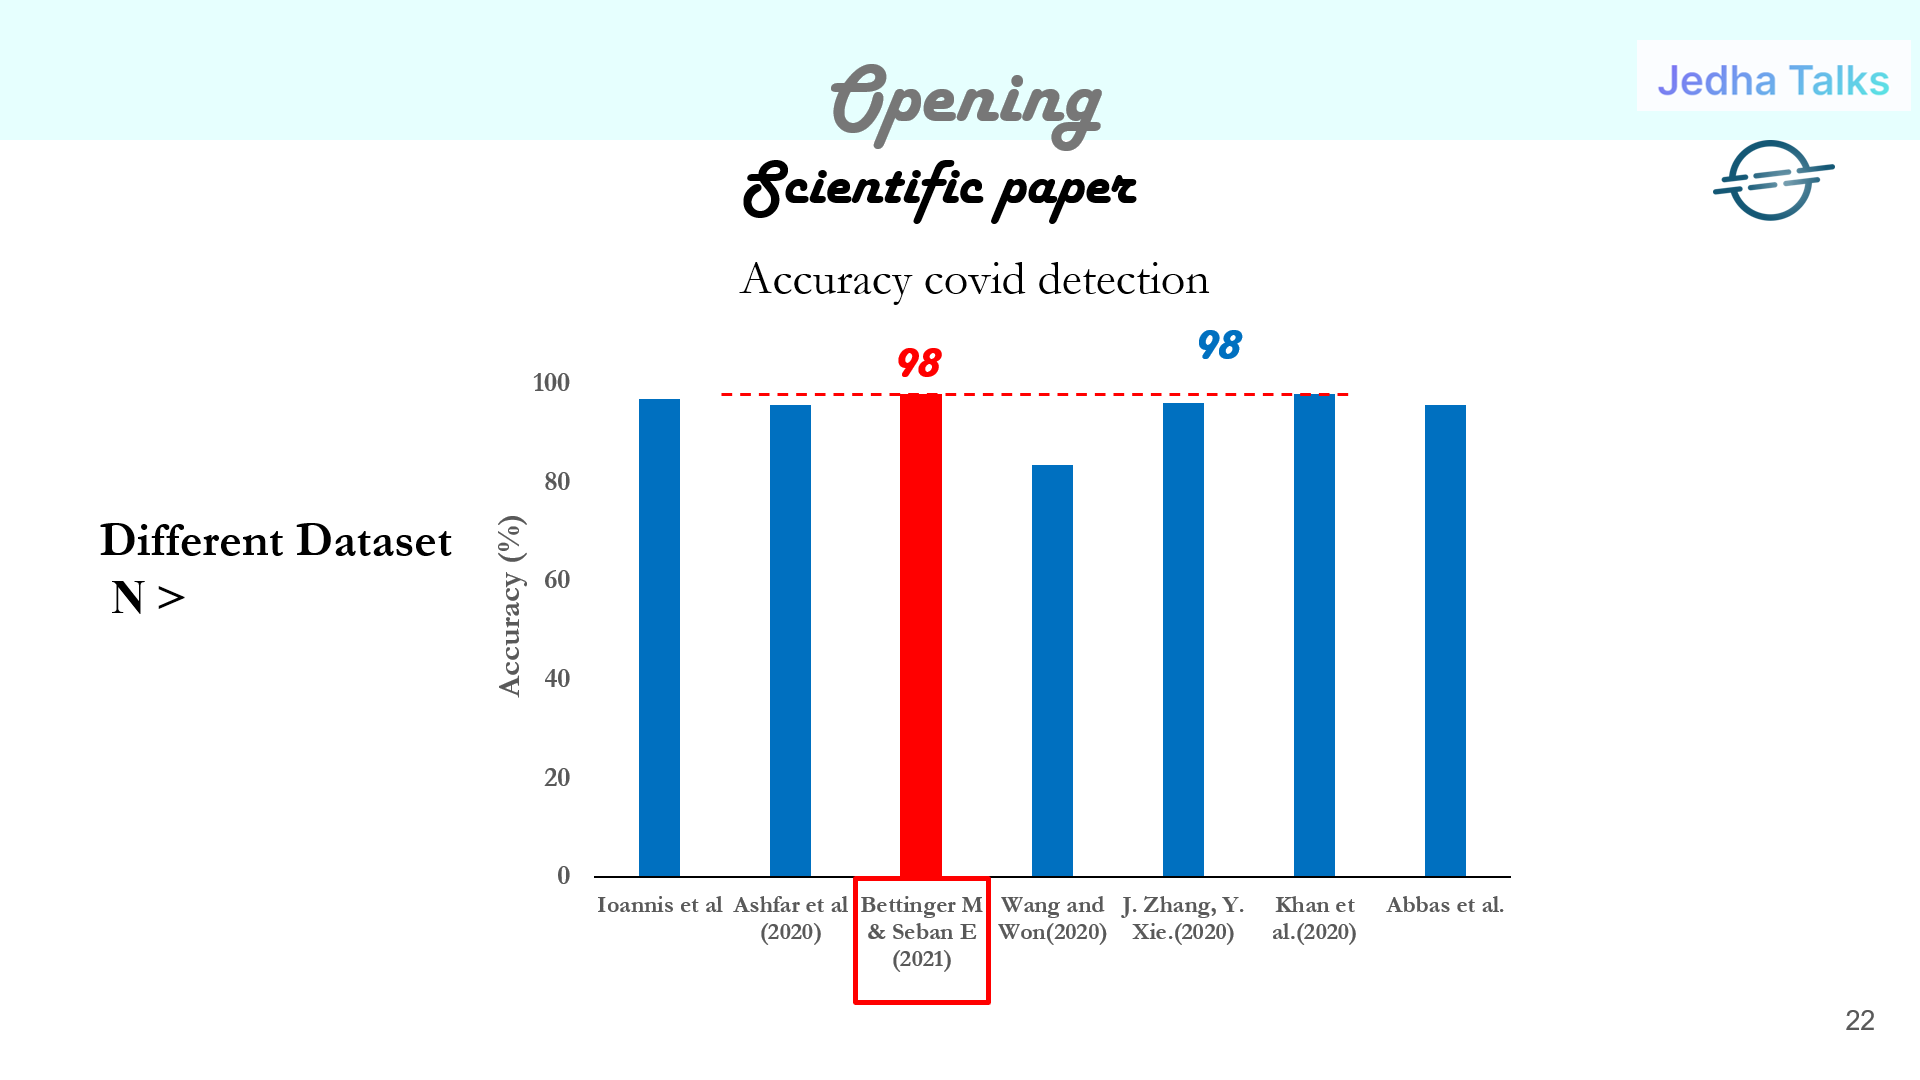

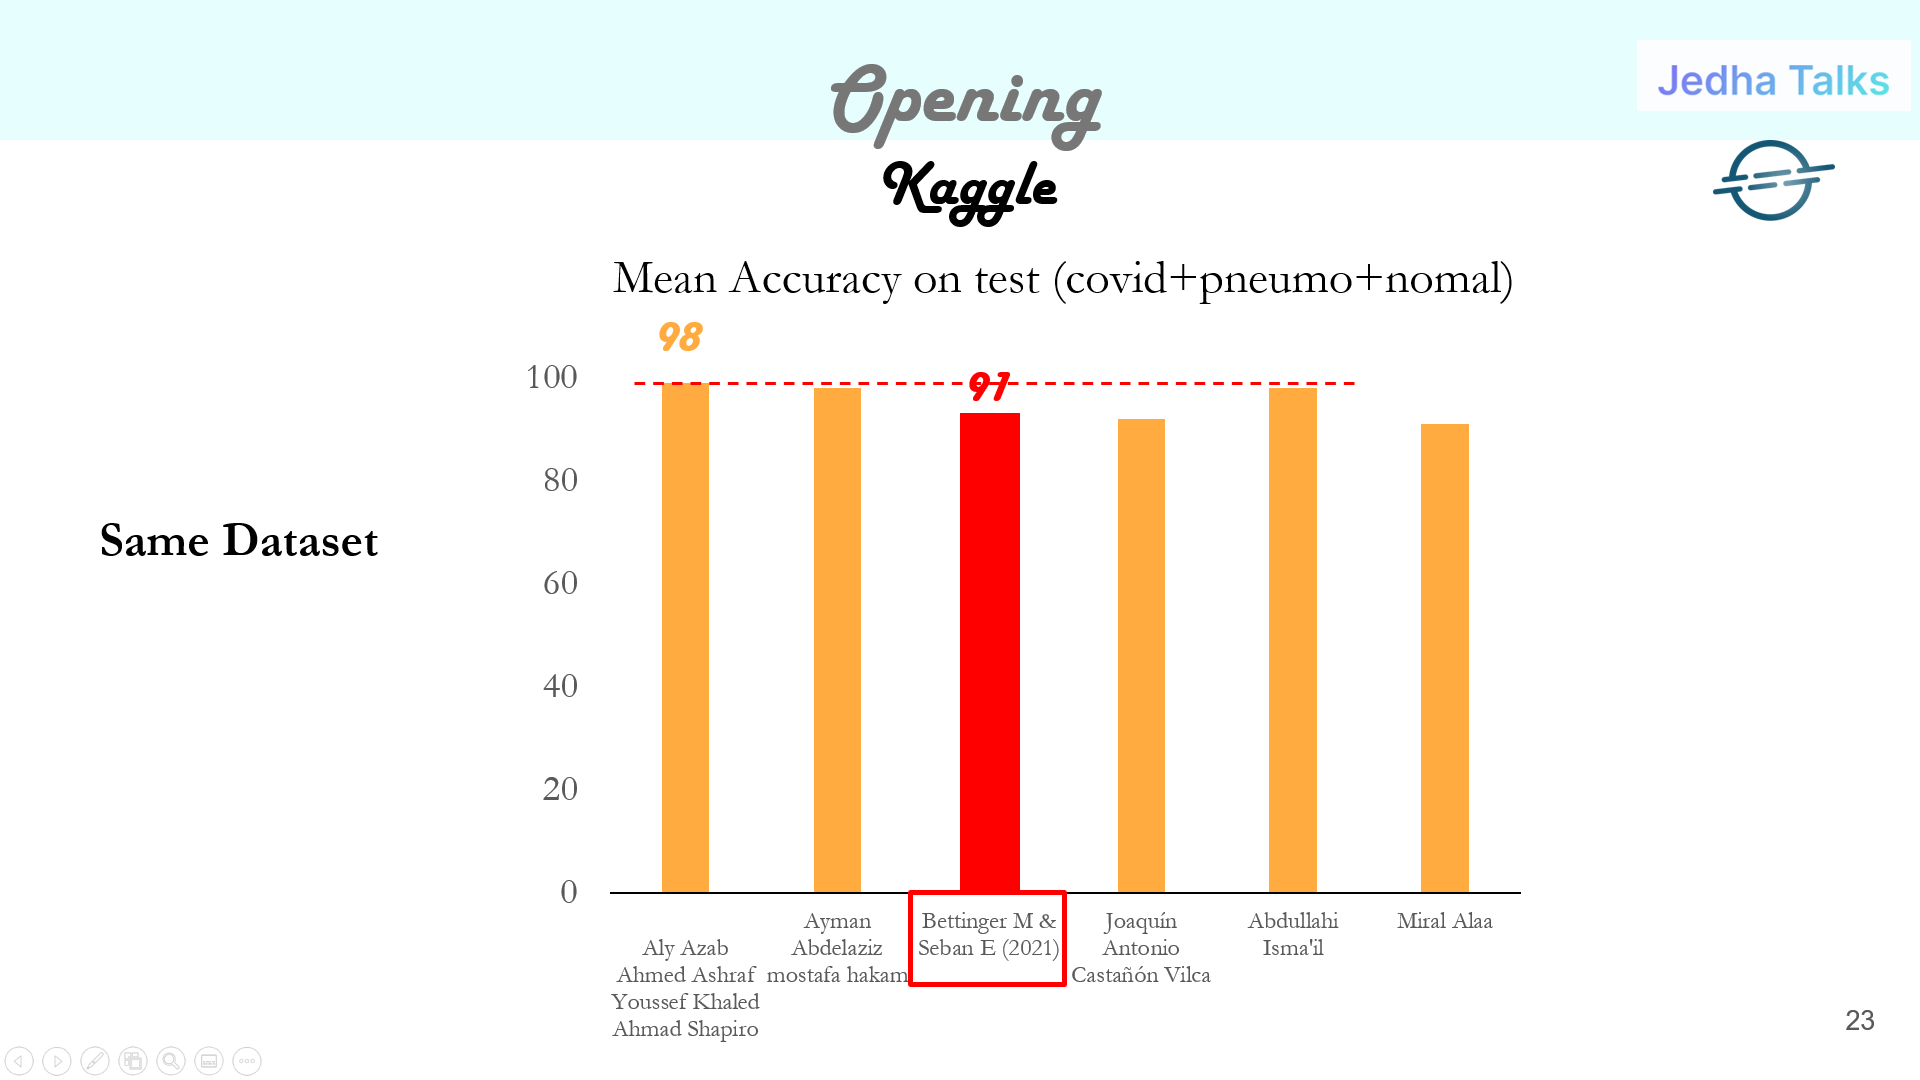

we suggest that the difference in accuracy is due to the fact that we take into account the bias which lowers the scores in the .test_set evaluation.

### We could conclude on 2 important point : 


* We did a manual croping that can substituate  by segmentation and boxing model such as yolov5 and cv2, it will be obviously a gain of time, therefore, this manual method permit us to adapt a crop for each image independantly font>, thus, we could assess that is the most precise way to get a good croping and thus to reduce the environnent bias 



* We observed quality images difference between groupes (Normal covid pneumonia), we recommend to train our model with more data with a better homogeneity of images quality between groupes, following that way, we will be confident on the viability and robustness of our model to detect the covid pneumonia



# There the result of our website for medical radiologist (link of the code on github )

## PAGE 1 /Upload images

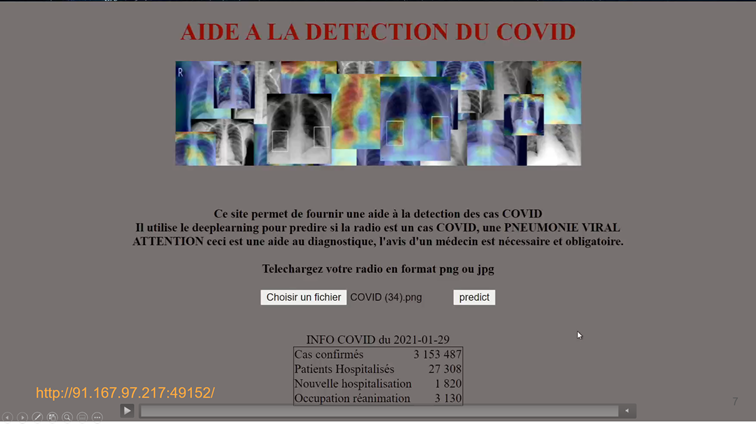

# PAGE 2 /Predicted result + grad cam visualisation

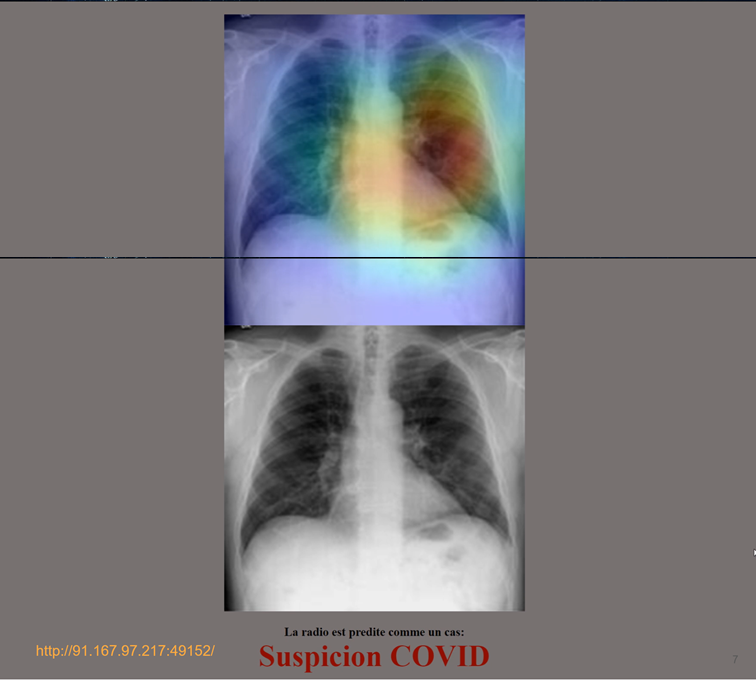